In [1]:
import pandas as pd
import numpy as np
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import recall_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/HumayDS/Big-data-analysis/main/Churn_Modelling.csv')
df.head()

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,2,3,15619304,Onio,502,NaN,Female,42,8,159660.80,3,1,0,113931.57,1
3,3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Get unique count for each variable
df.nunique()

,0
Unnamed: 0,10000
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382


In [4]:
Customer_id = df['CustomerId']

In [5]:
#Drop redundant columns
df = df.drop(['Unnamed: 0' , 'RowNumber' , 'CustomerId','Surname'] , axis = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        9999 non-null   object 
 2   Gender           9999 non-null   object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df.isnull().sum()

,0
CreditScore,0
Geography,1
Gender,1
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [8]:
#Check percentage of na's
df.isnull().mean()

,0
CreditScore,0.0000
Geography,0.0001
Gender,0.0001
Age,0.0000
Tenure,0.0000
Balance,0.0000
NumOfProducts,0.0000
HasCrCard,0.0000
IsActiveMember,0.0000
EstimatedSalary,0.0000


In [9]:
##Fill categoric column with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Geography'] = df['Geography'].fillna(df['Geography'].mode()[0])

In [10]:
##Check na
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [11]:
#Check na's by percentag
df.isnull().mean()

,0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0
HasCrCard,0.0
IsActiveMember,0.0
EstimatedSalary,0.0


In [12]:
##Save dataset
df.to_csv('df.clear.csv')

In [13]:
## Check descriptive stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [14]:
df.shape

(10000, 11)

# Explanotary Data Analysis (EDA)

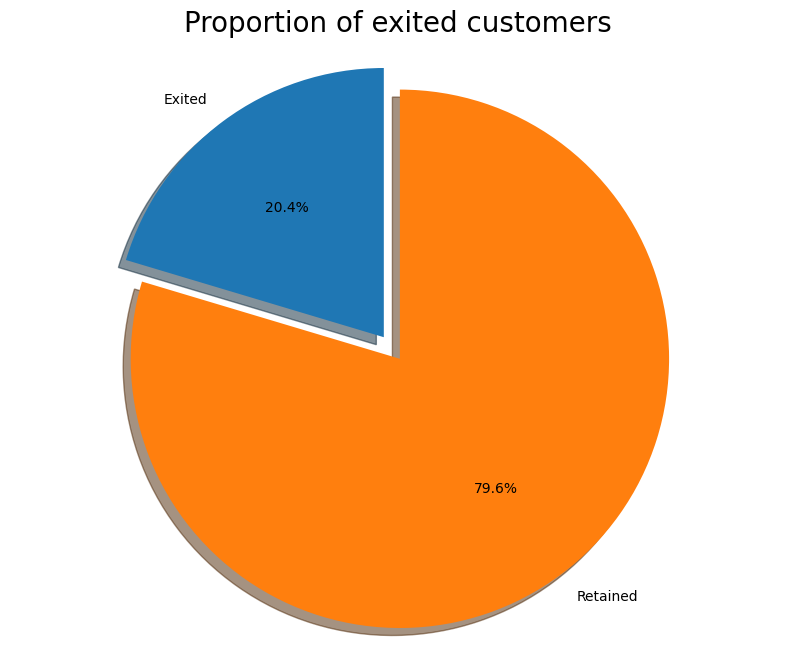

In [15]:
##Pie chart
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of exited customers", size = 20)
plt.show()

In [16]:
##Categoric variable analysis
#Geography and exited
g = df.groupby('Geography')['Exited'].agg(['count', 'sum'])
g.index.name = None
g['Perc'] = g['sum']/g['count']
g

,count,sum,Perc
France,5014,810,0.161548
Germany,2509,814,0.324432
Spain,2477,413,0.166734


In [17]:
##Analyse gender and Exited
ge = df.groupby('Gender')['Exited'].agg(['count', 'sum'])
ge.index.name = None
ge['Perc'] = ge['sum']/ge['count']
ge

,count,sum,Perc
Female,4542,1139,0.250771
Male,5458,898,0.164529


In [18]:
## Has cr card and exited
cr = df.groupby('HasCrCard')['Exited'].agg(['count', 'sum'])
cr.index.name = None
cr['Perc'] = cr['sum']/cr['count']
cr

,count,sum,Perc
0,2945,613,0.208149
1,7055,1424,0.201843


In [19]:
#Check by active member
am = df.groupby('IsActiveMember')['Exited'].agg(['count', 'sum'])
am.index.name = None
am['Perc'] = am['sum']/am['count']
am

,count,sum,Perc
0,4849,1302,0.268509
1,5151,735,0.142691


In [21]:
#Creating dummy variables(One hot encoding)
#Make sure you run it once
categorical_cols = df.select_dtypes(include='object').columns
df_dummies = pd.get_dummies(df[categorical_cols], drop_first=True, dtype=int)
df = df.drop(columns=categorical_cols)
df = pd.concat([df, df_dummies], axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


#Start Modelling
##Logistic regression

In [25]:
## FOR OVERFITTING CHECK WITH LOGISTIC REGRESSION
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# 🎯 Define features (X) and target (y)
X = df.drop(columns=['Exited'])
y = df['Exited']

# 1️⃣ Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 2️⃣ Logistic Regression
log_reg = LogisticRegression(
    max_iter=200,
    penalty='l2',
    solver='lbfgs'
)
log_model = log_reg.fit(X_train, y_train)

# 3️⃣ Predictions
pred_train = log_model.predict(X_train)
pred_test = log_model.predict(X_test)

# 4️⃣ Evaluate
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)

# ---- CUSTOM CONFUSION MATRIX FORMAT ----
def custom_cm(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    cm_custom = pd.DataFrame(
        [[tp, fp],
         [fn, tn]],
        index=['Predicted 1', 'Predicted 0'],
        columns=['Actual 1', 'Actual 0']
    )
    return cm_custom

# 5️⃣ Print results
print(f"🔹 Train Accuracy: {acc_train:.4f}")
print(f"🔹 Test Accuracy:  {acc_test:.4f}")

print("\n=== Train Classification Report ===")
print(classification_report(y_train, pred_train))

print("\nTrain Confusion Matrix:")
print(custom_cm(y_train, pred_train))

print("\n=== Test Classification Report ===")
print(classification_report(y_test, pred_test))

print("\nTest Confusion Matrix:")
print(custom_cm(y_test, pred_test))


🔹 Train Accuracy: 0.8077
🔹 Test Accuracy:  0.8193

=== Train Classification Report ===
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      5547
           1       0.61      0.21      0.31      1453

    accuracy                           0.81      7000
   macro avg       0.72      0.59      0.60      7000
weighted avg       0.78      0.81      0.77      7000


Train Confusion Matrix:
             Actual 1  Actual 0
Predicted 1       302       195
Predicted 0      1151      5352

=== Test Classification Report ===
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      2416
           1       0.61      0.20      0.30       584

    accuracy                           0.82      3000
   macro avg       0.72      0.58      0.60      3000
weighted avg       0.79      0.82      0.78      3000


Test Confusion Matrix:
             Actual 1  Actual 0
Predicted 1       116        74
Predicted 0   

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Random Forest

In [26]:
# FOR OVERFITTING
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# 🎯 Define features (X) and target (y)
X = df.drop(columns=['Exited'])   # all other columns are features
y = df['Exited']                  # target variable

# 1️⃣ Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 2️⃣ Initialize and train Random Forest model
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
rf_model = rf.fit(X_train, y_train)

# 3️⃣ Make predictions for both train and test
predictions_train = rf_model.predict(X_train)
predictions_test = rf_model.predict(X_test)

# ---- CUSTOM CONFUSION MATRIX FORMAT ----
def custom_cm(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    cm_custom = pd.DataFrame(
        [[tp, fp],
         [fn, tn]],
        index=['Predicted 1', 'Predicted 0'],
        columns=['Actual 1', 'Actual 0']
    )
    return cm_custom

# 4️⃣ Evaluate model performance
acc_train = accuracy_score(y_train, predictions_train)
acc_test = accuracy_score(y_test, predictions_test)

print(f"🔹 Train Accuracy: {acc_train:.4f}")
print(f"🔹 Test Accuracy:  {acc_test:.4f}")

print("\n=== Train Classification Report ===")
print(classification_report(y_train, predictions_train))

print("\nTrain Confusion Matrix:")
print(custom_cm(y_train, predictions_train))

print("\n=== Test Classification Report ===")
print(classification_report(y_test, predictions_test))

print("\nTest Confusion Matrix:")
print(custom_cm(y_test, predictions_test))

🔹 Train Accuracy: 0.9053
🔹 Test Accuracy:  0.8673

=== Train Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5547
           1       0.92      0.60      0.72      1453

    accuracy                           0.91      7000
   macro avg       0.91      0.79      0.83      7000
weighted avg       0.91      0.91      0.90      7000


Train Confusion Matrix:
             Actual 1  Actual 0
Predicted 1       869        79
Predicted 0       584      5468

=== Test Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.77      0.46      0.57       584

    accuracy                           0.87      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000


Test Confusion Matrix:
             Actual 1  Actual 0
Predicted 1       266        80
Predicted 0   

#Imbalanced dataset
###Imbalanced data means that in a dataset, one class is much more or much less frequent compared to the other. In other words, the classes in the target variable are not evenly distributed.

###This can lead to a model that fails to correctly predict the minority class.

###Result: high accuracy, but a useless model.

###💡 Therefore, in imbalanced datasets, accuracy alone is not enough.

###Problems caused by imbalanced data:

###iased model: The model learns the dominant class and fails to recognize the minority class correctly.

###Poor recall / F1-score: It becomes difficult to correctly predict the minority class.

###Critical class may be missed: In important fields like healthcare or fraud detection, failing to predict the minority class can cause serious problems.

###Rule of thumb: If one class has >70–80% of the observations, the dataset may be imbalanced. The occurrence of class 1 (or minority class) is considered a rare event.

In [27]:
#Check
y.value_counts(normalize=True)

,proportion
Exited,
0,0.7963
1,0.2037


#Solutions — A) Data-Level B) Algorithm-Level

A) Resampling (Data-Level Solutions)

Oversampling → Increase the minority class (e.g., SMOTE, ADASYN)

Undersampling → Reduce the dominant class

Synthetic data generation

SMOTE: Creates synthetic examples for the minority class

B) Algorithm-Level Solutions

If the imbalance is very severe, recall may still remain low (e.g., scale_pos_weight=4).

Set class weights

In sklearn models: class_weight='balanced'

Gives more importance to the minority class → increases recall, but may decrease accuracy.

Problem: The model learns the dominant class and fails to predict the minority class correctly. Solution: Use resampling, class weights, or specialized evaluation metrics.

#Scaling

Scaling is the process of transforming numerical features so that they all have a similar scale.
Make all features “look similar” in magnitude so that no feature dominates the model just because its numbers are bigger.

Before scaling:

salary = 8000

age = 35

Model sees:

8000 >> 35 → salary is “more important”

After scaling (example):

salary_scaled = 1.28

age_scaled = −0.44

Scaling = transforming all numeric features to the same scale so that ML models can learn correctly.

It prevents:

domination of large features

incorrect distance calculations

unstable training

weaker accuracy

# ⭐ StandardScaler (Standard Scaling)

StandardScaler transforms each numerical feature so that it has:

- **Mean = 0**  
- **Standard deviation = 1**

This is done using the formula:

scaled = x - mean(x) / std(x)

Use when you are working with Distance - based algorithm. It is not suitable for Tree- based models(Desicion tree, Random Forest, Xgboost)

# SVM

Support Vector Machine (SVM) is a model that tries to find the best line (or curve) that separates classes.

It looks for the widest possible margin between two classes.

It focuses only on the most important points (support vectors).

SVM can draw straight lines (linear) or curved boundaries (RBF kernel) to separate data.

👉 SVM = find the cleanest and widest boundary between classes.

In [34]:
# FOR OVERFITTING - SVM VERSION
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# 🎯 Define features (X) and target (y)
X = df.drop(columns=['Exited'])   # all other columns are features
y = df['Exited']                  # target variable

# 1️⃣ Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 2️⃣ Initialize and train SVM model (with scaling)
svm_model = make_pipeline(
    StandardScaler(),             # scale features (very important for SVM)
    SVC(
        kernel='rbf',             # non-linear SVM
        C= 1,                    # regularization (bigger C → more overfitting risk) Controls trade-off between “correctly classifying training examples”
        gamma='scale',            # default, usually good, gamma measures the influence area of a single data point:
         class_weight='balanced' # uncomment if classes are imbalanced
    )
)

svm_model.fit(X_train, y_train)

# 3️⃣ Make predictions for both train and test
predictions_train = svm_model.predict(X_train)
predictions_test = svm_model.predict(X_test)

# ---- CUSTOM CONFUSION MATRIX FORMAT ----
def custom_cm(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    cm_custom = pd.DataFrame(
        [[tp, fp],
         [fn, tn]],
        index=['Predicted 1', 'Predicted 0'],
        columns=['Actual 1', 'Actual 0']
    )
    return cm_custom

# 4️⃣ Evaluate model performance
acc_train = accuracy_score(y_train, predictions_train)
acc_test = accuracy_score(y_test, predictions_test)

print(f"🔹 Train Accuracy: {acc_train:.4f}")
print(f"🔹 Test Accuracy:  {acc_test:.4f}")

print("\n=== Train Classification Report ===")
print(classification_report(y_train, predictions_train))

print("\nTrain Confusion Matrix:")
print(custom_cm(y_train, predictions_train))

print("\n=== Test Classification Report ===")
print(classification_report(y_test, predictions_test))

print("\nTest Confusion Matrix:")
print(custom_cm(y_test, predictions_test))

🔹 Train Accuracy: 0.8224
🔹 Test Accuracy:  0.7877

=== Train Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      5547
           1       0.55      0.80      0.65      1453

    accuracy                           0.82      7000
   macro avg       0.75      0.82      0.77      7000
weighted avg       0.86      0.82      0.83      7000


Train Confusion Matrix:
             Actual 1  Actual 0
Predicted 1      1167       957
Predicted 0       286      4590

=== Test Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      2416
           1       0.47      0.73      0.57       584

    accuracy                           0.79      3000
   macro avg       0.70      0.77      0.72      3000
weighted avg       0.84      0.79      0.80      3000


Test Confusion Matrix:
             Actual 1  Actual 0
Predicted 1       426       479
Predicted 0   

# Xgboost

##It’s an optimized implementation of Gradient Boosting, designed for speed and performance.
###It’s widely used in Kaggle competitions, industry projects, and research, because it delivers:
###High accuracy
###Fast training speed
###Good handling of missing data and outliers
###Built-in regularization to prevent overfitting

###XGBoost stands for Extreme Gradient Boosting.
###Boosting = building a strong model by combining many weak models (usually decision trees).
###Each new tree is trained to fix the errors made by the previous ones.
###Gradient Boosting specifically uses gradient descent to minimize errors.
#XGBoost builds trees step-by-step, and at each step:
###It looks at where the model makes mistakes.
###It builds a new tree to correct those mistakes.
###It combines all trees for the final prediction.

Let’s say you’re predicting house prices.

Start with a simple model (like predicting the average price).

Calculate errors (difference between predicted and actual prices).

Build a small decision tree that predicts those errors.

Add the new tree’s predictions to improve the old model.

Repeat steps 2–4 many times (each tree fixes the previous model’s mistakes).

Combine all trees for the final result.

This is “boosting.”

🪵 Random Forest = Many independent trees that vote together → stable, simple, and fast.

⚡ XGBoost = Many dependent trees that learn from each other’s mistakes → more accurate, but more complex.

Random Forest = “A classroom of students answering the same question independently, then taking a majority vote.”

XGBoost = “A classroom where each student learns from the previous one’s mistakes to improve the final answer.”

In Random Forest, trees are independent
IN XGboost, trees are dependent

XGBoost adds learning_rate, regularization (L1/L2), and gamma, which don’t exist in Random Forest.

XGBOOST ✅ Handles missing values automatically. During training, it learns the best direction (left or right) to take when a feature is missing.
Less robust to outliers, because boosting focuses on correcting errors, and outliers create large errors that can distort learning
RANDOM FOREST ❌ Does not handle missing values automatically. You must fill or impute them before training (e.g., with mean, median, or mode).
Fairly robust to outliers, because Random Forest averages many trees → single outlier doesn’t influence much.


###🔹 Random Forest avoids overfitting through randomness and averaging.
###🔹 XGBoost can overfit because it learns sequentially, but offers strong regularization tools to control it.

# Hyperparameters of Xgboost

max_depth → Maximum depth of each decision tree (how many splits a tree can make).
🔹 Higher = more complex model → risk of overfitting.
🔹 Lower = simpler model → might underfit.
🔹 Usually between 3–10.
🔹 Start around 5–6.

learning_rate → Controls how much each new tree contributes to the model. This is one of the most important XGBoost parameters — sometimes it determines 70% of model performance.

Small → slower learning but more accurate.

Large → faster learning but riskier.
🔹 Usually between 0.01–0.3.
🔹 Start with 0.1; reduce if overfitting occurs.

0.05–0.1 → most stable and accurate models

0.01 → for very large datasets

0.2–0.3 → faster results, medium accuracy

0.3 → generally not recommended

n_estimators → Number of boosting rounds (trees).
🔹 More trees = better performance (up to a limit).
🔹 Too many trees → longer training, overfitting risk (if learning_rate is high).
🔹 Usually 100–1000.
🔹 Use early stopping to find the optimal number.

subsample → Percentage of observations (rows) used for each tree.

Each tree sees a different subset → more robust model.

1.0 → 100% of data

0.8 → 80% of data

0.5 → 50% of data
🔹 Adds randomness.
🔹 Lower = reduces overfitting.
🔹 Too low = underfitting.
🔹 Usually 0.5–1.0, 0.8 is a good start.

Example: subsample = 0.5, n_estimators = 1000:

Tree 1 → randomly selects 500 rows

Tree 2 → another random 500 rows

Tree 3 → another random 500 rows
➡ Each tree sees different points → model doesn’t memorize points → overall performance improves

colsample_bytree → Percentage of features (columns) used for each tree.
🔹 Reduces correlation between trees.
🔹 Lower = reduces overfitting.
🔹 Too low = underfitting.
🔹 Usually 0.5–1.0, often 0.8.

reg_alpha (L1 penalty) → Higher = stronger regularization → reduces overfitting.

Encourages sparsity (some features ignored).

Range: 0–5

reg_lambda (L2 penalty) → Penalizes large weights but does not make them zero.

Range: 1–10

Regularization = mechanism to prevent overfitting.

If model is too complex → overfitting occurs

Regularization → adds a “penalty” → simplifies model

In XGBoost, two ways to regularize:

L2 penalty → reg_lambda → makes model more “cautious”, reduces overfitting

1 → normal regularization

5 → stronger penalty → simpler model

0 → no penalty → risky, overfitting possible

L1 penalty → reg_alpha → can zero out unnecessary leaves, simplifies model

Useful for datasets with many features

Analogy:

L1 (alpha) → “cut some”

L2 (lambda) → “soften all a bit”

Defaults: reg_alpha = 0, reg_lambda = 1 (sufficient for small datasets)
For large datasets with many features → try reg_alpha = 0.1–1, reg_lambda = 1–5

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

# 🎯 Define features (X) and target (y)
X = df.drop(columns=['Exited'])   # all other columns are features
y = df['Exited']                  # target variable

# 1️⃣ Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 2️⃣ Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=200,         # number of trees (boosting rounds)
    learning_rate=0.2,        # step size shrinkage (lower → less overfitting)
    max_depth=6,              # depth of each tree
    subsample=1.0,            # use all data (can reduce to 0.8 to avoid overfitting)
    colsample_bytree=1.0,     # use all features per tree (reduce to 0.8 for regularization)
    reg_alpha=0,              # L1 regularization term
    reg_lambda=1,             # L2 regularization term
    random_state=42,
    use_label_encoder=False,  # avoid warning in newer XGBoost versions
    eval_metric='logloss'     # for classification problems
)

xgb_model.fit(X_train, y_train)

# 3️⃣ Make predictions for both train and test
pred_train = xgb_model.predict(X_train)
pred_test = xgb_model.predict(X_test)

# 4️⃣ Evaluate model performance
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
cm_train = confusion_matrix(y_train, pred_train)
cm_test = confusion_matrix(y_test, pred_test)

print(f"🔹 Train Accuracy: {acc_train:.4f}")
print(f"🔹 Test Accuracy:  {acc_test:.4f}")

print("\n=== Train Classification Report ===")
print(classification_report(y_train, pred_train))

print("Train Confusion Matrix:\n", cm_train)

print("\n=== Test Classification Report ===")
print(classification_report(y_test, pred_test))

print("Test Confusion Matrix:\n", cm_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:38:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔹 Train Accuracy: 0.9767
🔹 Test Accuracy:  0.8613

=== Train Classification Report ===
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5547
           1       0.99      0.90      0.94      1453

    accuracy                           0.98      7000
   macro avg       0.98      0.95      0.96      7000
weighted avg       0.98      0.98      0.98      7000

Train Confusion Matrix:
 [[5533   14]
 [ 149 1304]]

=== Test Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2416
           1       0.71      0.49      0.58       584

    accuracy                           0.86      3000
   macro avg       0.80      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000

Test Confusion Matrix:
 [[2299  117]
 [ 299  285]]


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import pandas as pd
from collections import Counter

# 🎯 Define features (X) and target (y)
X = df.drop(columns=['Exited'])
y = df['Exited']

# 1️⃣ Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y  # stratify=y ensures class distribution is preserved
)

# 2️⃣ Increase minority class using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("Original class distribution:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_res))

# 3️⃣ Calculate scale_pos_weight
neg, pos = Counter(y_res)[0], Counter(y_res)[1]
scale_pos_weight = neg / pos
print(f"\nscale_pos_weight = {scale_pos_weight:.2f}\n")

# 4️⃣ Create and fit XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.5,
    reg_lambda=2,
    scale_pos_weight=4,   # weight for imbalanced classes
    random_state=42,
)

xgb_model.fit(X_res, y_res)

# 5️⃣ Predictions
pred_train = xgb_model.predict(X_res)
pred_test = xgb_model.predict(X_test)

# Accuracy
acc_train = accuracy_score(y_res, pred_train)
acc_test = accuracy_score(y_test, pred_test)

print(f"🔹 Train accuracy: {acc_train:.4f}")
print(f"🔹 Test accuracy:  {acc_test:.4f}\n")

# 6️⃣ Confusion matrices: Predicted on top, Actual on left
def confusion_matrix_custom(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    cm_df = pd.DataFrame([[tp, fp],
                          [fn, tn]],
                         index=["Predicted 1", "Predicted 0"],
                         columns=["Actual 1", "Actual 0"])

    print("Confusion Matrix (Predicted on top, Actual on left):\n", cm_df)
    print(f"\nTP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}\n")

    return cm_df

# For Train set
print("=== For Train set ===")
print(classification_report(y_res, pred_train))
confusion_matrix_custom(y_res, pred_train)

# For Test set
print("=== For Test set ===")
print(classification_report(y_test, pred_test))
confusion_matrix_custom(y_test, pred_test)

Original class distribution: Counter({0: 5574, 1: 1426})
Class distribution after SMOTE: Counter({0: 5574, 1: 5574})

scale_pos_weight = 1.00

🔹 Train accuracy: 0.8175
🔹 Test accuracy:  0.6790

=== For Train set ===
              precision    recall  f1-score   support

           0       0.96      0.66      0.78      5574
           1       0.74      0.97      0.84      5574

    accuracy                           0.82     11148
   macro avg       0.85      0.82      0.81     11148
weighted avg       0.85      0.82      0.81     11148

Confusion Matrix (Predicted on top, Actual on left):
              Actual 1  Actual 0
Predicted 1      5422      1882
Predicted 0       152      3692

TP: 5422, TN: 3692, FP: 1882, FN: 152

=== For Test set ===
              precision    recall  f1-score   support

           0       0.95      0.63      0.76      2389
           1       0.38      0.87      0.53       611

    accuracy                           0.68      3000
   macro avg       0.66     

,Actual 1,Actual 0
Predicted 1,533,885
Predicted 0,78,1504
